In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from validation import read_grid_search_results
import ast
from scipy.stats import rankdata
import json

results_paths = [
	'fine_gs_results_giulia1.csv',
	'fine_gs_results_giulia2.csv',
	'fine_gs_results_giulia3.csv',
	'fine_gs_results_giulia4.csv',
	'fine_gs_results_irene1.csv',
	'fine_gs_results_irene2.csv',
	'fine_gs_results_irene3.csv',
	'fine_gs_results_irene4.csv'
]
all_results_path = 'fine_gs.csv'
ranked_results_path = 'fine_gs_params_rank.csv'
K = 5

# concatenate results into a single dataframe
scores_df = pd.DataFrame(columns=[])
for path in results_paths:
	partial_scores_df = pd.read_csv(path, sep=",")
	scores_df = pd.concat([scores_df, partial_scores_df], ignore_index=True)

N_MODELS=len(scores_df)

# rank results
scores_df['val_mee_mean_rank'] = rankdata(scores_df['val_mee_mean'], method='dense')
scores_df['val_mse_mean_rank'] = rankdata(scores_df['val_mse_mean'], method='dense')
scores_df['tr_mee_mean_rank'] = rankdata(scores_df['tr_mee_mean'], method='dense')
scores_df['tr_mse_mean_rank'] = rankdata(scores_df['tr_mse_mean'], method='dense')

# sort results by 'val_score_mean_rank'
scores_df = scores_df.sort_values(by=['val_mee_mean_rank'], ignore_index=True)
scores_df.drop(scores_df.columns[0], axis=1, inplace=True)

columns_order = [
	'val_mse_mean_rank',
	'val_mse_mean',
	'val_mse_dev',
	'val_mee_mean_rank',
	'val_mee_mean',
	'val_mee_dev',
	'tr_mse_mean_rank',
	'tr_mse_mean',
	'tr_mse_dev',
	'tr_mee_mean_rank',
	'tr_mee_mean',
	'tr_mee_dev',
]
for i in range(K):
	columns_order.append('split%d_val_mse'%(i))
	columns_order.append('split%d_val_mee'%(i))
	columns_order.append('split%d_tr_mse'%(i))
	columns_order.append('split%d_tr_mee'%(i))
	columns_order.append('split%d_best_epoch'%(i))
columns_order.append('params')
scores_df = scores_df[columns_order]

# write params as csv deleting fixed params
rem_list = [ 
	'activation_out',
	'classification',
	'early_stopping',
	'evaluation_metric',
	'loss',
	'metric_decrease_tol',
	'random_state',
	'reinit_weights',
	'stopping_patience',
	'tol',
	'validation_size',
	'verbose',
	'weights_bound',
	'weights_dist'
	]
params_df = pd.DataFrame(columns=[])
for param in scores_df['params']: # TODO: fare in modo migliore?
	params_dict = json.loads(param)
	for key in rem_list:
		del params_dict[key]
		params_dict['batch_size'] = str(params_dict['batch_size'])
	params_df = pd.concat([params_df, pd.DataFrame([params_dict])], ignore_index=True)

params_df['val_mee_mean'] = scores_df['val_mee_mean']
params_df['tr_mee_mean'] = scores_df['tr_mee_mean']
params_df['val_mee_dev'] = scores_df['val_mee_dev']
params_df['split0_val_mee'] = scores_df['split0_val_mee']
params_df['split1_val_mee'] = scores_df['split1_val_mee']
params_df['split2_val_mee'] = scores_df['split2_val_mee']
params_df['split3_val_mee'] = scores_df['split3_val_mee']
params_df['split4_val_mee'] = scores_df['split4_val_mee']
params_df['split0_best_epoch'] = scores_df['split0_best_epoch']
params_df['split1_best_epoch'] = scores_df['split1_best_epoch']
params_df['split2_best_epoch'] = scores_df['split2_best_epoch']
params_df['split3_best_epoch'] = scores_df['split3_best_epoch']
params_df['split4_best_epoch'] = scores_df['split4_best_epoch']

hidden_layer_sizes = []
for i in range(len(params_df)):
	if (params_df['hidden_layer_sizes'][i]) == [30, 30]:
		hidden_layer_sizes.append('2layer30')
	elif (params_df['hidden_layer_sizes'][i]) == [30, 60]:
		hidden_layer_sizes.append('2layer30-60')
	elif (params_df['hidden_layer_sizes'][i]) == [60, 30]:
		hidden_layer_sizes.append('2layer60-30')
	else:
		hidden_layer_sizes.append('3layer30')
params_df['hidden'] = hidden_layer_sizes
params_df

,activation_hidden,alpha,batch_size,epochs,hidden_layer_sizes,lambd,learning_rate,learning_rate_init,nesterov,tau,...,split1_val_mee,split2_val_mee,split3_val_mee,split4_val_mee,split0_best_epoch,split1_best_epoch,split2_best_epoch,split3_best_epoch,split4_best_epoch,hidden
0,logistic,0.75,128,500,"[60, 30]",0.0005,linear_decay,0.1,False,200,...,1.560931,1.270175,1.409711,1.383322,198.0,205.0,187.0,197.0,201.0,2layer60-30
1,logistic,0.75,128,500,"[60, 30]",0.0005,linear_decay,0.1,False,500,...,1.542944,1.244375,1.367447,1.447019,239.0,308.0,454.0,388.0,328.0,2layer60-30
2,logistic,0.75,128,500,"[60, 30]",0.0010,linear_decay,0.1,False,500,...,1.557210,1.299655,1.354278,1.435044,275.0,252.0,308.0,247.0,327.0,2layer60-30
3,logistic,0.75,128,500,"[30, 30, 30]",0.0005,linear_decay,0.1,False,200,...,1.540522,1.275583,1.402335,1.400209,197.0,194.0,212.0,200.0,183.0,3layer30
4,logistic,0.75,128,500,"[30, 30, 30]",0.0001,linear_decay,0.1,False,200,...,1.550631,1.306543,1.376753,1.391639,270.0,221.0,304.0,247.0,492.0,3layer30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,logistic,0.80,128,500,"[30, 30, 30]",0.0005,linear_decay,0.2,False,200,...,7.189575,7.177533,7.315734,7.411754,40.0,30.0,72.0,26.0,26.0,3layer30
936,logistic,0.80,128,500,"[30, 30, 30]",0.0001,linear_decay,0.2,True,200,...,7.151924,7.156957,7.463450,7.382423,10.0,18.0,28.0,20.0,28.0,3layer30
937,logistic,0.75,128,500,"[30, 30, 30]",0.0005,linear_decay,0.2,True,500,...,7.247688,7.064100,7.367191,7.411633,61.0,72.0,9.0,28.0,9.0,3layer30
938,logistic,0.80,128,500,"[30, 30, 30]",0.0010,linear_decay,0.2,True,200,...,7.440003,7.025122,7.379323,7.447007,19.0,0.0,66.0,17.0,77.0,3layer30


<AxesSubplot:xlabel='hidden', ylabel='alpha'>

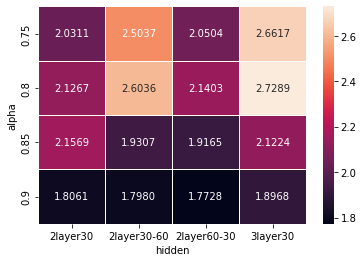

In [45]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='alpha',
        columns='hidden'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='alpha'>

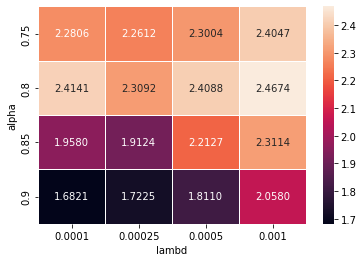

In [46]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='alpha',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)


<AxesSubplot:xlabel='learning_rate_init', ylabel='alpha'>

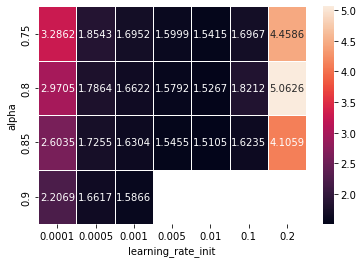

In [47]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='alpha',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='lambd', ylabel='hidden'>

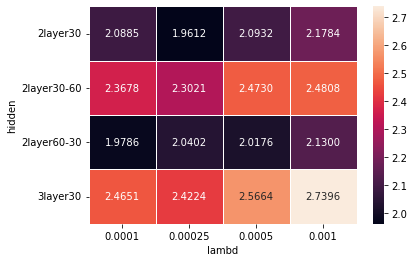

In [48]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='hidden',
        columns='lambd'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='learning_rate_init', ylabel='hidden'>

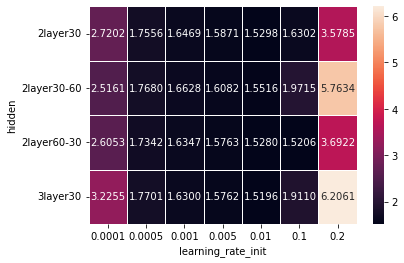

In [49]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='hidden',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

<AxesSubplot:xlabel='learning_rate_init', ylabel='lambd'>

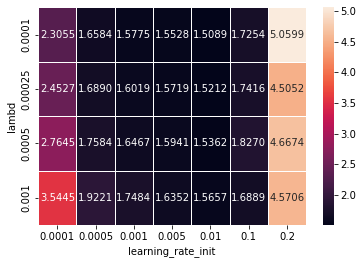

In [50]:
pvt_k = pd.pivot_table(
        params_df, 
        values='val_mee_mean', 
        index='lambd',
        columns='learning_rate_init'
    )
sns.heatmap(pvt_k, annot=True, fmt=".4f", linewidths=.5)

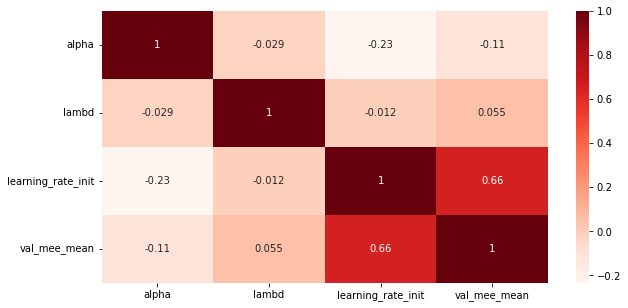

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(params_df[['alpha', 'lambd', 'learning_rate_init', 'learning_rate', 'hidden', 'val_mee_mean']].corr(), cmap=plt.cm.Reds, annot=True)
plt.show()

Text(0, 0.5, 'val_mee_mean')

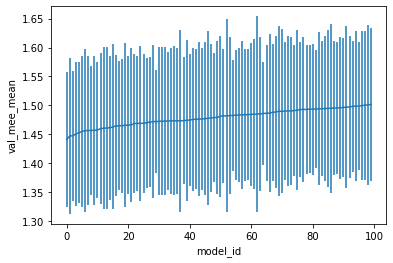

In [52]:
plt.errorbar(x=np.arange(100), y=params_df['val_mee_mean'][:100], yerr=params_df['val_mee_dev'][:100])
plt.xlabel("model_id")
plt.ylabel("val_mee_mean")

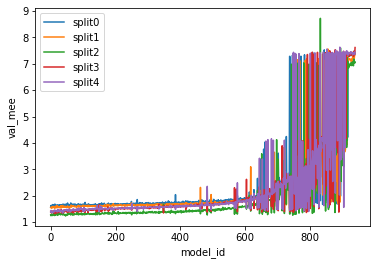

In [53]:
plt.plot(np.arange(N_MODELS), params_df['split0_val_mee'], label='split0')
plt.plot(np.arange(N_MODELS), params_df['split1_val_mee'], label='split1')
plt.plot(np.arange(N_MODELS), params_df['split2_val_mee'], label='split2')
plt.plot(np.arange(N_MODELS), params_df['split3_val_mee'], label='split3')
plt.plot(np.arange(N_MODELS), params_df['split4_val_mee'], label='split4')
plt.xlabel("model_id")
plt.ylabel("val_mee")
plt.legend()

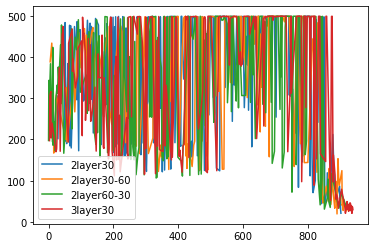

In [54]:
plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='2layer30']+
		params_df['split1_best_epoch'][params_df['hidden']=='2layer30']+
		params_df['split2_best_epoch'][params_df['hidden']=='2layer30']+
		params_df['split3_best_epoch'][params_df['hidden']=='2layer30']+
		params_df['split4_best_epoch'][params_df['hidden']=='2layer30'])/5
		,label='2layer30')
plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='2layer30-60']+
		params_df['split1_best_epoch'][params_df['hidden']=='2layer30-60']+
		params_df['split2_best_epoch'][params_df['hidden']=='2layer30-60']+
		params_df['split3_best_epoch'][params_df['hidden']=='2layer30-60']+
		params_df['split4_best_epoch'][params_df['hidden']=='2layer30-60'])/5
		,label='2layer30-60')
plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='2layer60-30']+
		params_df['split1_best_epoch'][params_df['hidden']=='2layer60-30']+
		params_df['split2_best_epoch'][params_df['hidden']=='2layer60-30']+
		params_df['split3_best_epoch'][params_df['hidden']=='2layer60-30']+
		params_df['split4_best_epoch'][params_df['hidden']=='2layer60-30'])/5
		,label='2layer60-30')
plt.plot((params_df['split0_best_epoch'][params_df['hidden']=='3layer30']+
		params_df['split1_best_epoch'][params_df['hidden']=='3layer30']+
		params_df['split2_best_epoch'][params_df['hidden']=='3layer30']+
		params_df['split3_best_epoch'][params_df['hidden']=='3layer30']+
		params_df['split4_best_epoch'][params_df['hidden']=='3layer30'])/5
		,label='3layer30')
plt.legend()

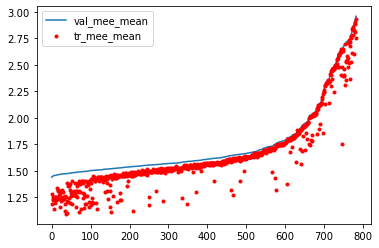

In [59]:
y_val = params_df['val_mee_mean'][(params_df['val_mee_mean']<3)]
y_tr = params_df['tr_mee_mean'][(params_df['val_mee_mean']<3)]
plt.plot(y_val, label='val_mee_mean')
plt.plot(y_tr, 'r.', label='tr_mee_mean')
plt.legend()

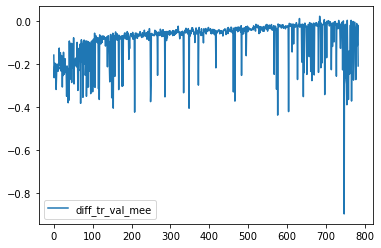

In [60]:
plt.plot(y_tr-y_val, label='diff_tr_val_mee')
plt.legend()

In [56]:
# retrain dei best con curve (controlla overfitting)
# perchè vanno in overflow
# cosa hanno in comune le migliori?
# ne scegliamo una o facciamo un ensemble?
# serve search ancora più fine?
# come vedere quante ore mancano?

# TENIAMO IN CONSIDERAZIONE CHE:
# reti più grosse => regolarizzazione maggiore (+pesi=+parametri)
# favorire modelli con lambda più alto se hanno pari perf (meno complessi, meno probabile che vadano in overfitting)
# se non troviamo trend => facciamo ensemble (oppure se dev std alta)

# DA VISUALIZZARE:
# 3d heatmap per ogni topoplogia
# test statistici per media e dev standard?
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_stats.html
# plot medie e dev standard MEE (applicare 1-standard error rule)

# A CUI PENSARE:
# ultima va male perchè momentum e lr sono bassi e necessitavano di più epoche (ciò significa che il momentum è implementato bene)
# lr > 0.0005 in gs2 (rank 36/54)

# NEL FRATTEMPO:
# Pulire codice gs e val e nel frattempo e mettere su script per ensemble / evaluation finale?
# Per la classificazione fare controlli in score (target encoding) 
# Rivedere implementazione metriche!!! Eventualmente implementare score in modo che prenda una lista di metriche e restituisca una lista di predizioni. 
# Senza linear decay non fare il controllo su tau 
# Fare test su Monk, curve e risultati in tabella (migliore configurazione)

# La chiave sta nel velocizzare il train scartate le combinazioni che esplodono / si bloccano?
# Le altre in principio con un numero grande di epoche e una buona regolarizzazione migliorano...
#Attenzione con batch size 128 quanti batch ci sono
#Giustificazione topologia e f attivazione prima gs
#Vedere metriche sul train, plotting overfitting? quando lambda piccolo va in overfitting?
#Vedere regolarità curve con zoom
# se fissiamo un massimo di 500 epoche (motivare) possiamo aumentare momentum / diminuire lr e viceversa
# nesterov dovrebbe velocizzare ancora di più!
# perchè linear decay va male? learning rate troppo piccolo => training si blocca?? bisognerebbe vedere se epoca migliore è << max (ma quando sono 200 magari sono già troppo poche per vederlo)
# come individuare cosa non andava in quelle che esplodevano?
# prendiamo le ultime x e contiamo qual'è il parametro più frequente
# come clusterizzare configurazioni simili tenendo in considerazione media e dev std?